<a href="https://colab.research.google.com/github/prerita09/project/blob/master/Breast_Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: Detection of Breast Cancer based on data



In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Load data
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('data.csv')
df



Saving data.csv to data (3).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#count no. of rows and cols in dataset

df.shape

(569, 32)

In [ ]:
#count number of empty values in each col (NaN, NAN, na)

df.isna().sum()



id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Get count of number of Malignant(M: Cancerous) or Belign(B) cells
df['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

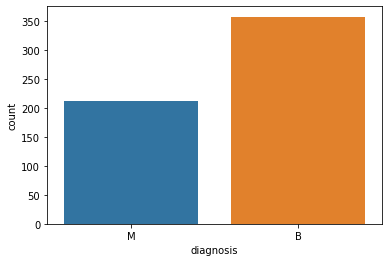

In [ ]:
#Visualize

sns.countplot(df['diagnosis'],label='count')

In [ ]:
#Look at the data types to see which col need to be encoded

df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#Encode the categorical data values

from sklearn.preprocessing import LabelEncoder

labelencoder_Y =LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)


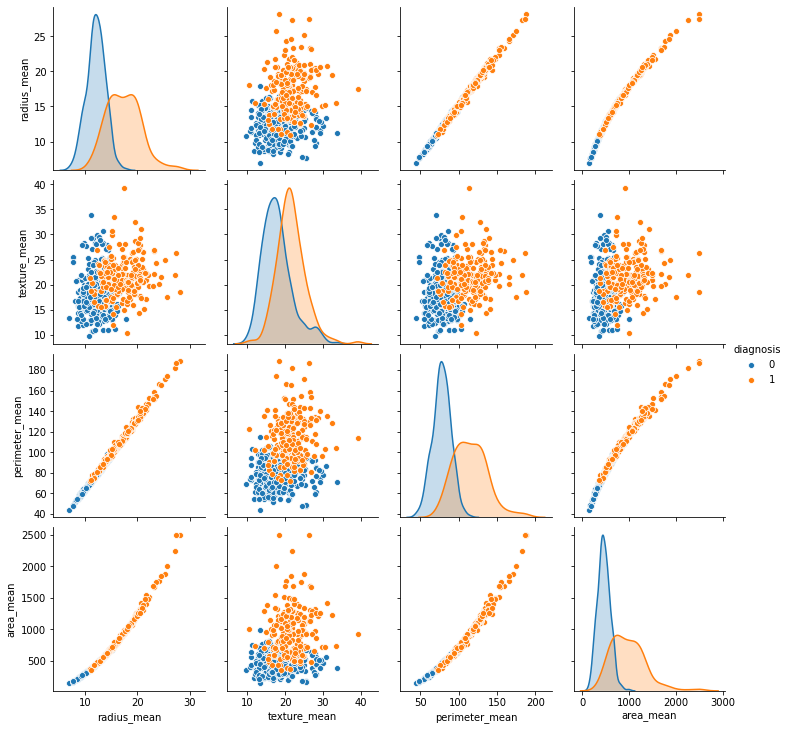

In [ ]:
#Pair Plot
sns.pairplot(df.iloc[:,1:6], hue='diagnosis') #to get diagnosis points

In [ ]:
#correlation

df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


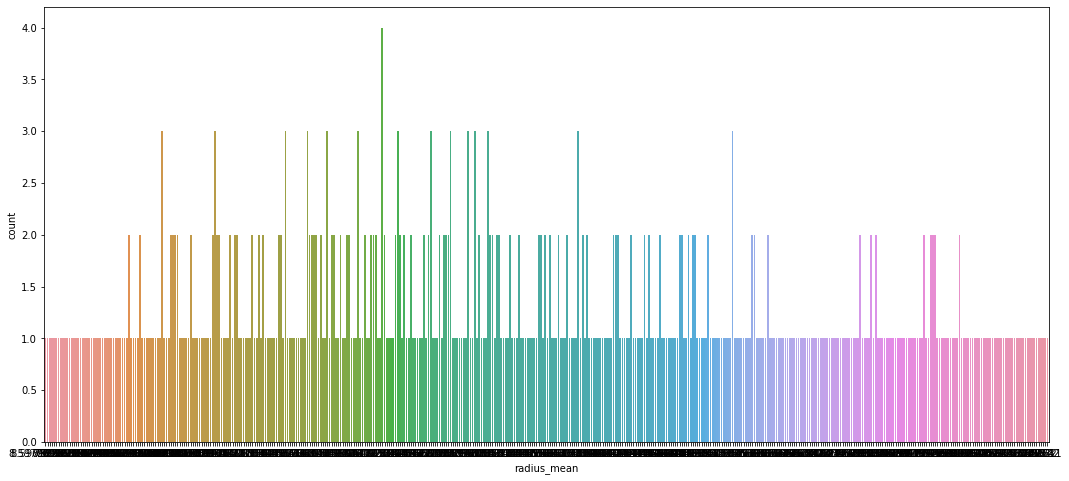

In [ ]:
# counter plot of feature mean radius
plt.figure(figsize = (18,8))
sns.countplot(df['radius_mean'])

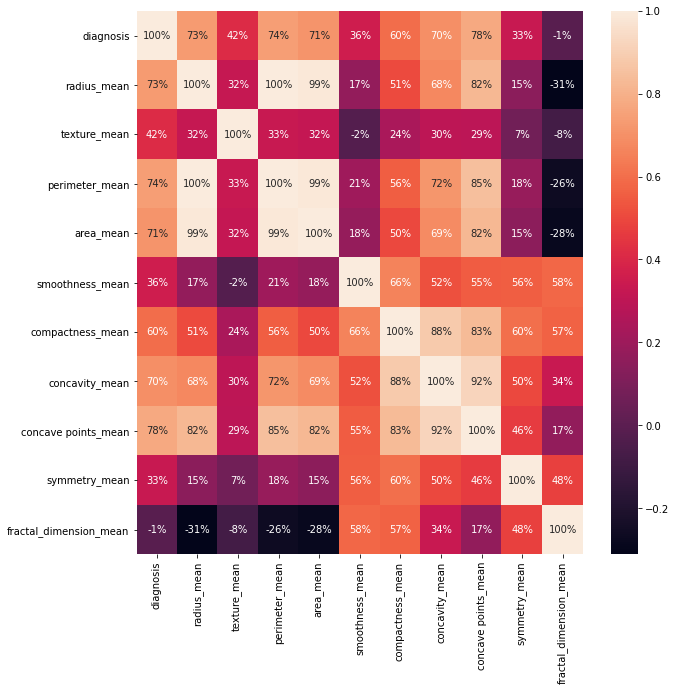

In [ ]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True, fmt=".0%")

In [ ]:
#split the dataset into independent(X) and dependent(Y) data sets
from sklearn.utils import shuffle
x=df.iloc[:,2:31].values
y=df.iloc[:,1].values
x,y=shuffle(x,y)




In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)



In [ ]:
x_train,y_train=shuffle(x_train,y_train)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

KNN 
Training Accuracy 0.971830985915493
Model KNN

[[84  1]
 [ 7 51]]

Testing Accuracy= 0.9440559440559441



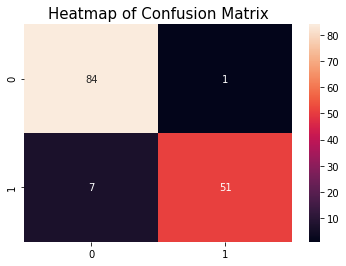


Classification Report of KNN

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        85
           1       0.98      0.88      0.93        58

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.95      0.94      0.94       143

Accuracy Score:  0.9440559440559441



In [ ]:
#K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, metric= 'minkowski')
knn.fit(x_train,y_train)
print("KNN \nTraining Accuracy", knn.score(x_train,y_train))

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Model KNN')
cm=confusion_matrix(y_test, knn.predict(x_test))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print()
print(cm)
print()
print('Testing Accuracy=', (TP+TN)/(TP+TN+FN+FP))
print()
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

print()
print("Classification Report of KNN")
print()
print(classification_report(y_test,knn.predict(x_test)))
print("Accuracy Score: ",accuracy_score(y_test,knn.predict(x_test)))
print()



SVC
Training Accuracy 0.9835680751173709
Model Support Vector Machine

[[84  1]
 [ 2 56]]

Testing Accuracy= 0.9790209790209791



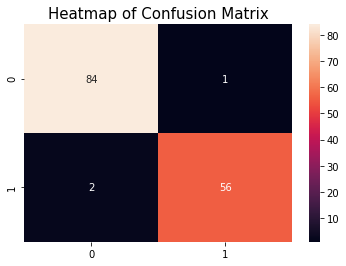


Classification Report of Support Vector Machine

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        85
           1       0.98      0.97      0.97        58

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy Score:  0.9790209790209791



In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
print("SVC\nTraining Accuracy", svc.score(x_train,y_train))

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Model Support Vector Machine')
cm=confusion_matrix(y_test, svc.predict(x_test))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print()
print(cm)
print()
print('Testing Accuracy=', (TP+TN)/(TP+TN+FN+FP))
print()
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

print()
print("Classification Report of Support Vector Machine")
print()
print(classification_report(y_test,svc.predict(x_test)))
print("Accuracy Score: ",accuracy_score(y_test,svc.predict(x_test)))
print()

In [ ]:
#Logictic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(x_train,y_train)
print("Logictic Regression \nTraining Accuracy", log.score(x_train,y_train))

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Model: Logistic Regression')
cm=confusion_matrix(y_test, log.predict(x_test))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print()
print(cm)
print()
print('Testing Accuracy=', (TP+TN)/(TP+TN+FN+FP))
print()
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()
print()
print("Classification Report of Logistic Regression")
print()
print(classification_report(y_test,log.predict(x_test)))
print("Accuracy Score: ",accuracy_score(y_test,log.predict(x_test)))
print()


In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Model: Naive Bayes\nTraining Accuracy',nb.score(x_train,y_train))
cm=confusion_matrix(y_test, nb.predict(x_test))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print()
print(cm)
print()
print('Testing Accuracy=', (TP+TN)/(TP+TN+FN+FP))
print()
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

print()
print("Classification Report of Naive Bayes")
print()
print(classification_report(y_test,nb.predict(x_test)))
print("Accuracy Score: ",accuracy_score(y_test,nb.predict(x_test)))
print()

Model: Random Forest
Training Accuracy 0.9953051643192489

[[84  1]
 [ 7 51]]

Testing Accuracy= 0.9440559440559441



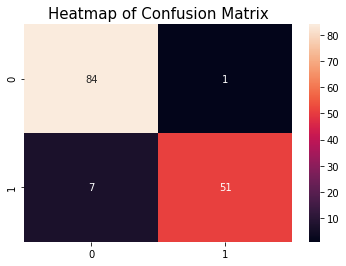


Classification Report of Random Forest

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        85
           1       0.98      0.88      0.93        58

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.95      0.94      0.94       143

Accuracy Score:  0.9440559440559441



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10, criterion='entropy')
forest.fit(x_train,y_train)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Model: Random Forest\nTraining Accuracy',forest.score(x_train,y_train))
cm=confusion_matrix(y_test, forest.predict(x_test))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print()
print(cm)
print()
print('Testing Accuracy=', (TP+TN)/(TP+TN+FN+FP))
print()
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

print()
print("Classification Report of Random Forest")
print()
print(classification_report(y_test,forest.predict(x_test)))
print("Accuracy Score: ",accuracy_score(y_test,forest.predict(x_test)))
print()

In [ ]:
#Comparing the confusion matrices 
from sklearn.metrics import confusion_matrix
print("Confusion Matrix of KNN: \n Training Set")
cm=confusion_matrix(y_train, knn.predict(x_train))
print(cm,"\n\nTesting State")
cm=confusion_matrix(y_test, knn.predict(x_test))
print(cm)
print("\nConfusion Matrix of Support Vector Machine: \n Training Set")
cm=confusion_matrix(y_train, svc.predict(x_train))
print(cm)
print("\nTesting State")
cm=confusion_matrix(y_test, svc.predict(x_test))
print(cm)
print("\nConfusion Matrix of Logistic Regression: \n Training Set")
cm=confusion_matrix(y_train, log.predict(x_train))
print(cm)
print("\nTesting State")
cm=confusion_matrix(y_test, log.predict(x_test))
print(cm)
print("\nConfusion Matrix of Naive Bayes: \n Training Set")
cm=confusion_matrix(y_train, nb.predict(x_train))
print(cm)
print("\nTesting State")
cm=confusion_matrix(y_test, nb.predict(x_test))
print(cm)
print("\nConfusion Matrix of Random Forest: \n Training Set")
cm=confusion_matrix(y_train, forest.predict(x_train))
print(cm)
print("\nTesting State")
cm=confusion_matrix(y_test, forest.predict(x_test))
print(cm)

Confusion Matrix of KNN: 
 Training Set
[[268   4]
 [  9 145]] 

Testing State
[[84  1]
 [ 3 55]]

Confusion Matrix of Support Vector Machine: 
 Training Set
[[271   1]
 [  6 148]]

Testing State
[[85  0]
 [ 2 56]]

Confusion Matrix of Logistic Regression: 
 Training Set
[[270   2]
 [  6 148]]

Testing State
[[83  2]
 [ 1 57]]

Confusion Matrix of Naive Bayes: 
 Training Set
[[264   8]
 [ 13 141]]

Testing State
[[84  1]
 [ 7 51]]

Confusion Matrix of Random Forest: 
 Training Set
[[269   3]
 [  7 147]]

Testing State
[[85  0]
 [ 3 55]]
